In [1]:
!pip install -U numpy

!pip install -U pandas

!pip install -U scipy

!pip install -U scikit-learn

!pip install -U imbalanced-learn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 15.3 MB 18.4 MB/s eta 0:00:01
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.0 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.ut

In [2]:

from sklearn.cluster import KMeans

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#!conda update pandas

<h1> First part <h1>

In [108]:
CLIENT_ID = 'FRM4224K20BOGMKYUWTQMXX0BX23XEMEDV3JVOLUZTFO0MDJ' # your Foursquare ID
CLIENT_SECRET = '5AA5YBOKNAJ1QJILP15SGQ1T41UEPE2NIVULFW0Q43MXCMSL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [4]:
html_data=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [5]:
soup=BeautifulSoup(html_data.content,'html5lib')

In [6]:
table_contents=[]
table=soup.find('table')

In [7]:
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [8]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [9]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [10]:
df.shape

(103, 3)

The final dataframe has 103 rows and 3 columns

# Second part

In [12]:
!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0      

mkl_random-1.2.0     | 313 KB    | ##################################### | 100% 
beautifulsoup4-4.9.3 | 86 KB     | ##################################### | 100% 
libgcc-ng-9.3.0      | 7.8 MB    | ##################################### | 100% 
libevent-2.1.10      | 1.1 MB    | ##################################### | 100% 
setuptools-49.6.0    | 947 KB    | ##################################### | 100% 
pyasn1-0.4.8         | 53 KB     | ##################################### | 100% 
pytest-6.2.4         | 432 KB    | ##################################### | 100% 
jpeg-9d              | 264 KB    | ##################################### | 100% 
mpmath-1.2.1         | 437 KB    | ##################################### | 100% 
cloudpickle-1.6.0    | 22 KB     | ##################################### | 100% 
gast-0.4.0           | 12 KB     | ##################################### | 100% 
importlib-metadata-4 | 30 KB     | ##################################### | 100% 
pyodbc-4.0.30        | 71 KB

libxkbcommon-1.0.3   | 581 KB    | ##################################### | 100% 
libffi-3.3           | 51 KB     | ##################################### | 100% 
liblapack-3.9.0      | 11 KB     | ##################################### | 100% 
mpc-1.1.0            | 105 KB    | ##################################### | 100% 
dataclasses-0.8      | 7 KB      | ##################################### | 100% 
hdf5-1.10.6          | 3.1 MB    | ##################################### | 100% 
markdown-3.3.4       | 67 KB     | ##################################### | 100% 
numexpr-2.7.3        | 201 KB    | ##################################### | 100% 
mpfr-4.0.2           | 648 KB    | ##################################### | 100% 
libgfortran-ng-7.5.0 | 22 KB     | ##################################### | 100% 
soupsieve-2.0.1      | 30 KB     | ##################################### | 100% 
libglib-2.68.2       | 3.1 MB    | ##################################### | 100% 
dill-0.3.3           | 60 KB

In [13]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ca_explorer")

In [14]:
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

postal_code='M3A'

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
latitude,longitude


(43.75245000000007, -79.32990999999998)

In [15]:
import geocoder # import geocoder

lat_lng_coords = None
latitude=[]
longitude=[]

for postalcode in df.PostalCode:
# loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postalcode))
        lat_lng_coords = g.latlng
    this_latitude = lat_lng_coords[0]
    this_longitude = lat_lng_coords[1]
    latitude.append(this_latitude)
    longitude.append(this_longitude)
    lat_lng_coords = None

df['Latitude']=latitude
df['Longitude']=longitude
df


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto Business,Enclave of M4L,43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


<h1>Part Three<h1>

In [17]:
toronto_data=df
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto Business,Enclave of M4L,43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
toronto_venues = getNearbyVenues(toronto_data['Neighborhood'],toronto_data['Latitude'],toronto_data['Longitude'])

In [20]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.75245,-79.32991,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.75245,-79.32991,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.73057,-79.31306,Wigmore Park,43.731023,-79.310771,Park
4,Victoria Village,43.73057,-79.31306,Memories of Africa,43.726602,-79.312427,Grocery Store
...,...,...,...,...,...,...,...
2386,"Mimico NW, The Queensway West, South of Bloor,...",43.62513,-79.52681,Tactical Products Canada,43.626801,-79.529388,Miscellaneous Shop
2387,"Mimico NW, The Queensway West, South of Bloor,...",43.62513,-79.52681,Queensway Fish & Chips,43.621720,-79.524588,Fish & Chips Shop
2388,"Mimico NW, The Queensway West, South of Bloor,...",43.62513,-79.52681,Sleep Country,43.621340,-79.526708,Mattress Store
2389,"Mimico NW, The Queensway West, South of Bloor,...",43.62513,-79.52681,Global Pet Foods,43.621304,-79.526146,Pet Store


In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,13,13,13,13,13,13
"Alderwood, Long Branch",4,4,4,4,4,4
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
Berczy Park,63,63,63,63,63,63
...,...,...,...,...,...,...
"Willowdale, Newtonbrook",22,22,22,22,22,22
Woburn,4,4,4,4,4,4
Woodbine Heights,18,18,18,18,18,18


In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.015873,0.0,0.015873,0.0,...,0.015873,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
98,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
99,York Mills West,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [52]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [25]:
import numpy as np

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [106]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Discount Store,Bakery,Bubble Tea Shop,Sushi Restaurant,Vietnamese Restaurant,Grocery Store,Hong Kong Restaurant,Shopping Mall,Badminton Court
1,"Alderwood, Long Branch",Convenience Store,Gym,Pub,Athletics & Sports,Yoga Studio,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
2,Bayview Village,Trail,Park,Construction & Landscaping,Escape Room,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
3,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Butcher,Juice Bar,Restaurant,Café,Pub,Thai Restaurant,Indian Restaurant
4,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Farmers Market,Pharmacy,Breakfast Spot,Cheese Shop,Restaurant


In [96]:
len(kmeans.labels_)

101

In [107]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,Fast Food Restaurant,Food & Drink Shop,Park,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Escape Room
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,German Restaurant,Grocery Store,Park,Yoga Studio,Eastern European Restaurant,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,0.0,Coffee Shop,Restaurant,Breakfast Spot,Theater,Gym / Fitness Center,Italian Restaurant,Food Truck,Event Space,Electronics Store,Distribution Center
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,0.0,Clothing Store,Furniture / Home Store,Toy / Game Store,Men's Store,Cosmetics Shop,Food Court,Bookstore,Women's Store,Restaurant,Kitchen Supply Store
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,0.0,Coffee Shop,Mediterranean Restaurant,Sandwich Place,Fried Chicken Joint,Italian Restaurant,Café,Theater,Gastropub,Bank,Portuguese Restaurant


In [29]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  fol

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [110]:
toronto_merged.dropna(inplace=True)

In [64]:
toronto_merged['Cluster Labels'].unique()

array([0., 2., 4., 1., 3.])

In [70]:
latitude=43.75245000000007
longitude=-79.32990999999998

In [111]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

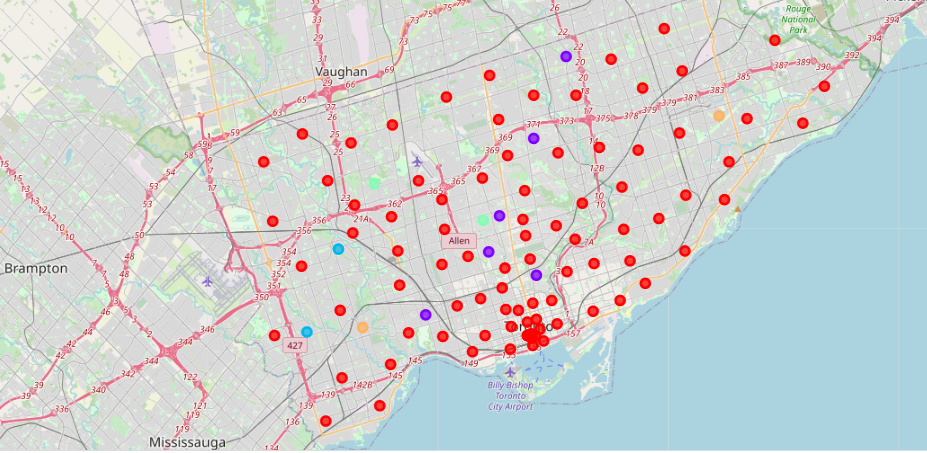